## **Описание задачи**: <br> Датасет состоит из данных о красных и белых винах Винью Верде с севера Португалии. Цель задачи состоит в том, чтобы определить качество вина(от 0 до 10) на основе физико-химических тестов.

**Источник:** https://notebooks.githubusercontent.com/view/ipynb?browser=unknown_browser&bypass_fastly=true&color_mode=auto&commit=f9b771b45ec4e834a50a1f0b47041dc38990b9e6&device=unknown_device&enc_url=68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f416c657865794172656665762f6d616368696e654c6561726e696e672f663962373731623435656334653833346135306131663062343730343164633338393930623965362f4d4c5f7461736b5f312e6970796e62&logged_in=false&nwo=AlexeyArefev%2FmachineLearning&path=ML_task_1.ipynb&platform=unknown_platform&repository_id=416028444&repository_type=Repository&version=0

---

<br>
Вино имеет следующие признаки:

1 - Тип вина(type):

2 - Фиксированная кислотность(fixed acidity): большинство кислот, связанных с вином, которые не испаряются быстро

3 - Летучая кислотность(volatile acidity): количество уксусной кислоты в вине, слишком высокое содержание которой может привести к неприятному вкусу уксуса

4 - Лимонная кислота(citric acid): в небольших количествах лимонная кислота может придавать винам «свежесть» и аромат

5 - Остаточный сахар(residual sugar): количество сахара, остающегося после остановки брожения

6 - Хлориды(chlorides): количество соли в вине

7 - Количество диоксида серы свободной формы(free sulfur dioxide): предотвращает рост микробов и окисление вина

8 - Общее количество диоксида серы(total sulfur dioxide): в низких концентрациях SO2 в основном не обнаруживается в вине, но при концентрациях свободного SO2 более 50 частей на миллион SO2 становится заметным в носу и вкусе вина.

9 - Плотность(density)

10 - pH: описывает степень кислотности или щелочности вина по шкале от 0 (очень кислая) до 14 (очень щелочная). У большинства вин уровень pH составляет 3-4.

11 - Сульфаты(sulfates): добавка, которая может способствовать повышению уровня газообразного диоксида серы

12 - Алкоголь(alcohol): процентное содержание алкоголя в вине

И то, что мы будем предсказывать:

13 - Качество вина(quality)

<br>

---




###1. Чтение данных

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
%matplotlib inline

data = pd.read_csv("https://raw.githubusercontent.com/wesleybeckner/"\
      "ds_for_engineers/main/data/wine_quality/winequalityN.csv")

###2. Визуализация данных и вычисление основных характеристик:

In [3]:
data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Информация о количественных признаках:

In [4]:
data.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Минимальное качество вина - 3, а максимальное 9. В датасете отсутствуют данные о винах, которые имеют качества 0, 1, 2, 3

Среднее качество вин: 5.82, разброс 0.87, это говорит о том, что большинство вин имеет качество 5 или 6

Информация о категориальных признаках:

In [5]:
data.describe(include = ['object'])

,type
count,6497
unique,2
top,white
freq,4898


В датасете белого вина больше, чем красного

Вычислим матрицу корреляции и визуализируем ее

In [13]:
corr_mat = data.corr(numeric_only=True)
#corr_mat

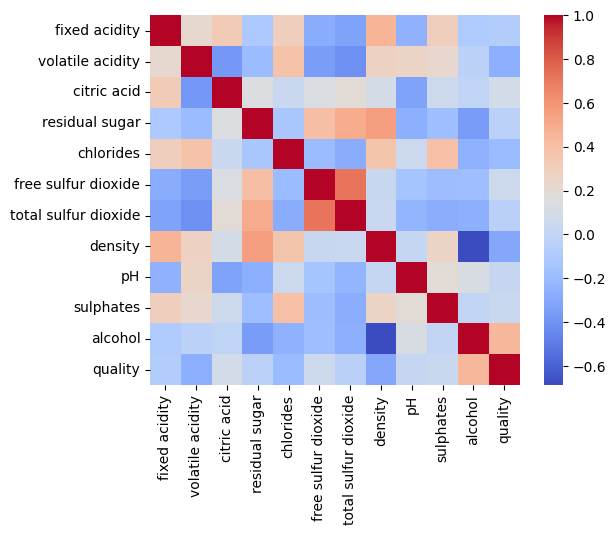

In [8]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

Посмотрим с чем коррелирует целевой признак: есть корреляция(0.44) между качеством вина и процентным содержанием алкоголя, а также несильную отрицательную корреляцию у качества вина и такими признаками, как плотность, хлориды и фиксированная кислотность.

Найдем сильно коррелирующие признаки (с корреляцией > 0.5):

In [12]:
#corr_mat > 0.5

In [10]:
#corr_mat > 0.5
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack().sort_values(ascending=False)

free sulfur dioxide  total sulfur dioxide    0.720934
residual sugar       density                 0.552498
dtype: float64

Наблюдается значительная корреляция между количеством SO2 свободной формы и общим количеством SO2, она равна 0.72. Такая корреляция может быть объяснена тем, что в большинстве случаев увеличение числа SO2 в свободной форме приводит к увеличению общего числа SO2(т.е. число связанных форм SO2 в среднем при этом не уменьшается).

Также есть корреляция между плотностью и остаточным сахаром

В остальных случаях значительной корреляции между признаками не наблюдается

В матрице корреляции также наблюдаются отрицательные значения, найдем признаки с корреляцией < -0.5

In [11]:
#corr_mat < -0.5
corr_mat.where(np.triu(corr_mat < -0.5, k=1)).stack().sort_values(ascending=False)

density  alcohol   -0.686745
dtype: float64

Между признаками процентного содержания алкоголя и плотности есть сильная отрицательная корреляция: -0.69. Это говорит о том, что чем больше содержания алкоголя, тем меньше плотность.

Теперь стало понятно, почему у плотности и качества вина отрицательная корреляция, хоть и небольшая - между признаками качество и процентное содержание алкоголя положительная корреляция, в то же время у процентного содержания алкоголя и плотности отрицательная корреляция.

###3. Обработатка пропущенных значений

In [15]:
data.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

Исключим строки с пропущенными значениями(так как количество пропущенных значений невелико)

In [16]:
dataWONan = (data.dropna()).copy()
dataWONan

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Датасет стал меньше на 34 строки

### 4. Обработатка категориальных признаков
В датасете имеется один категориальный признак(не считая целевого), и он бинарный. Это тип вина.

Бинарный признак 'type' заменим на числовой.

'white' → 0, 'red'→ 1

In [17]:
dataWONan['type'] = pd.factorize(dataWONan['type'])[0]
dataWONan

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,0,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,0,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,1,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,1,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,1,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,1,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


###5. Нормализация
Воспользуемся стандартизацией, так как диапазоны признаков большой

In [19]:
dataWONan_stand = (dataWONan.drop(['type', 'quality'], axis=1)).copy()
dataWONan_stand = (dataWONan_stand - dataWONan_stand.mean(axis = 0))/dataWONan_stand.std(axis = 0)
dataWONan_stand.join(dataWONan['type'])
dataWONan_stand.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6.463000e+03,6.463000e+03,6.463000e+03,6.463000e+03,6.463000e+03,6.463000e+03,6463.000000,6.463000e+03,6.463000e+03,6.463000e+03,6.463000e+03
mean,-1.143377e-16,-2.462658e-16,-8.795206e-17,2.110850e-16,-3.518083e-17,-1.759041e-17,0.000000,5.222594e-14,9.762679e-16,1.583137e-16,-5.453028e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.633270e+00,-1.576715e+00,-2.194510e+00,-1.018312e+00,-1.341551e+00,-1.662097e+00,-1.940577,-2.528009e+00,-3.101975e+00,-2.089467e+00,-2.089319e+00
25%,-6.300537e-01,-6.656323e-01,-4.733664e-01,-7.660440e-01,-5.147708e-01,-7.611355e-01,-0.684534,-7.888463e-01,-6.743362e-01,-6.792513e-01,-8.321195e-01
50%,-1.677731e-01,-3.011992e-01,-6.029195e-02,-5.137764e-01,-2.581838e-01,-8.541478e-02,0.040786,6.407665e-02,-5.186461e-02,-1.420263e-01,-1.616132e-01
75%,3.715542e-01,3.669283e-01,4.904739e-01,5.583613e-01,2.549901e-01,5.903060e-01,0.713034,7.670717e-01,6.328541e-01,4.623518e-01,6.765196e-01
max,6.689389e+00,7.534114e+00,9.233882e+00,1.268823e+01,1.582127e+01,1.455520e+01,5.737206,1.475368e+01,4.927908e+00,9.863789e+00,3.693798e+00


###6. Разобьем данные на тестовую и обучающую выборки

In [20]:
XWONan = dataWONan_stand
yWONan = dataWONan['quality']

In [22]:
XWONan_train, XWONan_test, yWONan_train, yWONan_test = train_test_split(XWONan, yWONan, test_size = 0.15, random_state = 404)

###7. - 8. Запуск kNN и вычисление ошибок
Запустим классификатор ближайших соседей с разным количеством соседей(от 1 до 10)

Для обучения возьмем количество соседей, при котором ошибка кросс-валидации будет минимальной

In [23]:
nnb = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(XWONan_train, yWONan_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors

print("Лучшее количество соседей:", best_n_neighbors)
print("Ошибка кросс-валидации:", best_cv_err)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


Лучшее количество соседей: 1
Ошибка кросс-валидации: 0.3826669978473256


In [24]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(XWONan_train, yWONan_train)

err_train = np.mean(yWONan_train != knn.predict(XWONan_train))
err_test  = np.mean(yWONan_test != knn.predict(XWONan_test))

print("Ошибка на обучающей выборке:", err_train)
print("Ошибка на тестовой выборке:", err_test)

Ошибка на обучающей выборке: 0.0
Ошибка на тестовой выборке: 0.3494845360824742


In [25]:
pd.DataFrame(confusion_matrix(yWONan_test, knn.predict(XWONan_test)), index = ['3', '4', '5', '6', '7', '8', '9'], 
             columns = ['3', '4', '5', '6', '7', '8', '9'])

,3,4,5,6,7,8,9
3,0,1,3,0,0,0,0
4,0,9,16,8,1,0,0
5,1,13,214,74,11,1,0
6,1,7,72,282,47,10,0
7,0,0,9,42,115,4,0
8,0,0,2,6,9,11,0
9,0,0,0,0,0,1,0


**Вывод**

Оптимальное количество соседей - это один сосед

Ошибка на тестовой выборке довольно большая (0.349), это может быть объяснено тем, что качество вина определялось людьми на основе их ощущений, и их ощущения, предположительно, не связаны с большинством признаков датасета.

Наблюдается переобучение, оно возникло из-за того, что для классификатора ближайших соседей с одним соседом ошибка на обучающей выборке всегда равна 0, а ошибка на тестовой выборке достаточно велика.

Из матрицы ошибок видно, что качество 5 довольно часто классифицируется как 6, качество 6 часто классифицируется как 5 и 7, а качество 7 часто классифицируется как 6.

Так же на точность классификации могла отрицательно повлиять несбалансированность классов.